In [51]:
import torch
import matplotlib.pyplot as plt

import pandas as pd # pandas 모듈 로드
import json  # json 모듈 로드

from PIL import Image

json_file_path="/opt/ml/dataset/train.json" # 파일로드

with open(json_file_path,'r') as j:
    contents=json.loads(j.read())  # open : r - 읽기모드, w-쓰기모드, a-추가모드  
contents.keys()
contents['annotations'][0]['image_id'] # id
contents['annotations'][0]['bbox'] # bbox

def bbox_to_rect(bbox, color):
    """Convert bounding box to matplotlib format."""
    # Convert the bounding box (top-left x, top-left y, bottom-right x,
    # bottom-right y) format to matplotlib format: ((upper-left x,
    # upper-left y), width, height)
    return plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2], height=bbox[3],
        fill=False, edgecolor=color, linewidth=1)

def show_image_with_bbox_cocoformat(img, cocoformat_ann_list, suptitle='object detection', class_name=1) :
    """
    img : PIL.Image.open 된 이미지 객체
    cocoformat_ann_list : 출력하고 싶은 cocoformat annotation bbox 배열
    suptitle : plot title
    class_name : 라벨 출력 유형 (1,2)
    """
    #read the image, creating an object
    fig, axes = plt.subplots(1,1,figsize=(12, 6))
    fig.suptitle(suptitle)
    fig = plt.imshow(img)

    # 10개 클래스 박스 컬러에 대해 컬러 구분
    colors = [(1, 0, 0, 1),  # 빨강 일반쓰레기
        (1, 0.5, 0, 1),  # 주황 
        (1, 1, 0, 1),  # 노랑
        (0.5, 1, 0, 1),  # 연두색
        (0, 1, 0, 1),  # 초록
        (0, 1, 1, 1),  # 청록
        (0, 0, 1, 1),  # 파랑
        (0, 0, 0.5, 1),  # 남색
        (0.5, 0, 0.5, 1),  # 보라
        (1, 0.75, 0.8, 1)]  # 핑크
    label_name = ["General trash", "Paper", "Paper pack", "Metal", 
              "Glass", "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]

    for info in cocoformat_ann_list :
        color = colors[info['category_id']]
        # 박스 출력
        bbox = info['bbox']
        fig.axes.add_patch(bbox_to_rect(bbox,color))
        # 박스 클래스명 출력
        if class_name == 1 :
            plt.annotate(label_name[info['category_id']], xy=(bbox[0], bbox[1]), xytext=(bbox[0]+int(bbox[2]*0.5),bbox[1]+int(bbox[3]*0.5)),
                fontsize=8, ha='center', color='yellow',backgroundcolor='black', arrowprops=dict(facecolor='white', width=0.3, shrink=0.1, headwidth=10))
        if class_name == 2 :
            plt.annotate(label_name[info['category_id']], xy=(bbox[0], bbox[1]), xytext=(bbox[0]+bbox[2]-50,bbox[1]-5),
                fontsize=8, ha='center', color=color)
    plt.axis('off')
    plt.show()


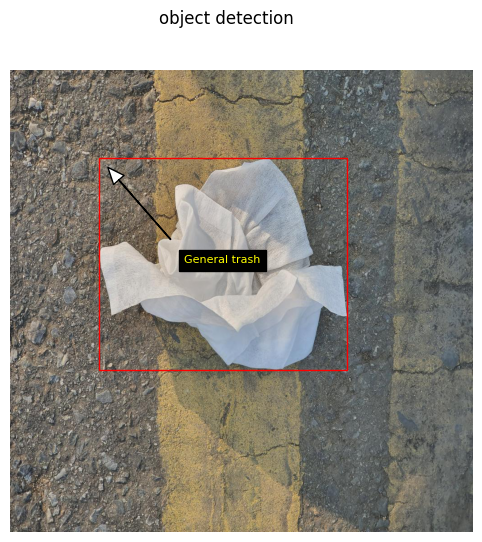

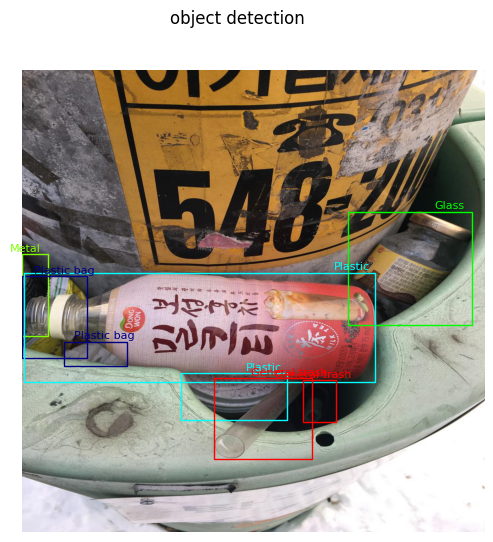

In [52]:
#### 사용 예시

data_dir = '/opt/ml/dataset/train/'

# 이미지 0000 출력
img_file_name = '0000.jpg'
img = Image.open(f"{data_dir}{img_file_name}")
bbox_info = contents['annotations'][0:1]
show_image_with_bbox_cocoformat(img, bbox_info)

# 이미지 0001 출력
img_file_name = '0001.jpg'
img = Image.open(f"{data_dir}{img_file_name}")
bbox_info = contents['annotations'][1:9]
show_image_with_bbox_cocoformat(img, bbox_info, class_name = 2)